#Dependências

In [70]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.multiarray import ndarray
import pandas as pd

# Configuração dos Gráficos

In [71]:
plt.style.use('dark_background')
plt.rcParams['figure.figsize'] = (8,6)
plt.rcParams['lines.linewidth'] = 3
plt.rcParams['font.size'] = 15

# Utils

In [72]:
def gera_parabola(x: ndarray) -> ndarray:
  ruido = np.random.randn(x.shape[0])/60
  return 2*((x-0.3)**2 -0.45*x+0.3) + ruido

In [73]:
def normalize(array):
  return (array - array.min()) / (array.max() - array.min())

#Dataset e Normalização

In [74]:
idades = np.array([18, 20, 25, 28, 30, 32, 40, 50, 55, 65, 70])
n_idades = normalize(idades)
n_valores = gera_parabola(n_idades)
valores = n_valores * 10000

print(n_idades)
print(n_valores)

[0.         0.03846154 0.13461538 0.19230769 0.23076923 0.26923077
 0.42307692 0.61538462 0.71153846 0.90384615 1.        ]
[0.80579861 0.68597014 0.53048578 0.44904394 0.39953222 0.33634385
 0.23508019 0.25162894 0.33956531 0.4991896  0.68279434]


Text(0.5, 1.0, 'Valor do seguro em função da idade')

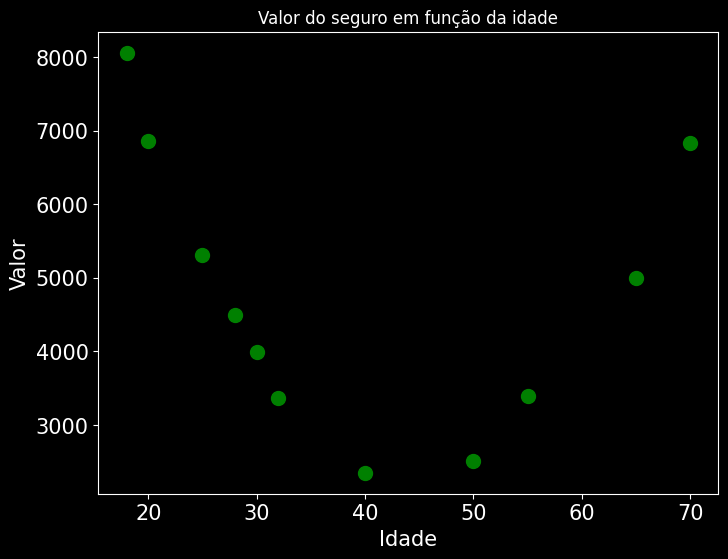

In [75]:
plt.scatter(idades,valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade', fontdict={'size':12})

Text(0.5, 1.0, 'Valor do seguro em função da idade (Normalizados)')

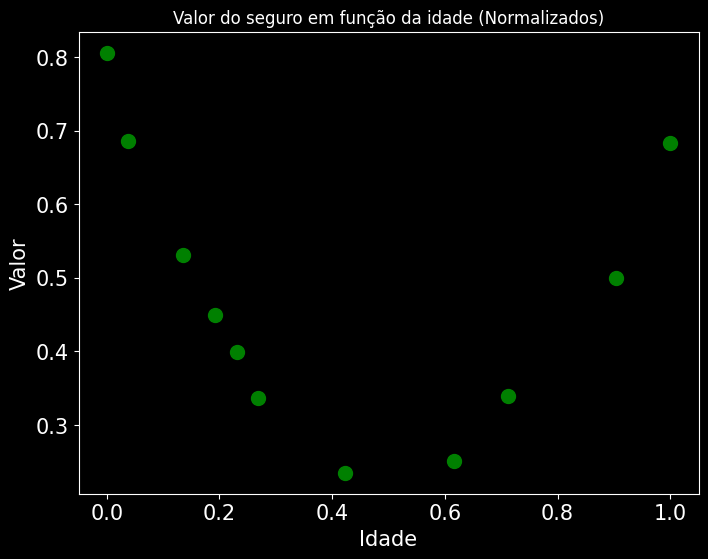

In [76]:
plt.scatter(n_idades,n_valores, s=100,color = "green")
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.title('Valor do seguro em função da idade (Normalizados)', fontdict={'size':12})

In [77]:
df = pd.DataFrame({'idade':n_idades, 'valor': n_valores})
df

,idade,valor
0,0.000000,0.805799
1,0.038462,0.685970
2,0.134615,0.530486
3,0.192308,0.449044
4,0.230769,0.399532
5,0.269231,0.336344
6,0.423077,0.235080
7,0.615385,0.251629
8,0.711538,0.339565
9,0.903846,0.499190


# Arquitetura do Modelo

In [78]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(2, activation="sigmoid", input_shape=(1,)),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(2, activation="sigmoid"),
    tf.keras.layers.Dense(1)
])


adam = tf.keras.optimizers.Adam(learning_rate=0.1)

model.compile(optimizer=adam, loss='mse')

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 2)                 4         
                                                                 
 dense_21 (Dense)            (None, 2)                 6         
                                                                 
 dense_22 (Dense)            (None, 2)                 6         
                                                                 
 dense_23 (Dense)            (None, 2)                 6         
                                                                 
 dense_24 (Dense)            (None, 2)                 6         
                                                                 
 dense_25 (Dense)            (None, 1)                 3         
                                                                 
Total params: 31 (124.00 Byte)
Trainable params: 31 (1

# Treinamento

In [79]:
log = model.fit(n_idades, n_valores, epochs=400)
losses = log.history['loss']

Epoch 1/400
1/1 [==============================] - 1s 1s/step - loss: 0.3762
Epoch 2/400
1/1 [==============================] - 0s 10ms/step - loss: 0.1382
Epoch 3/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0381
Epoch 4/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0498
Epoch 5/400
1/1 [==============================] - 0s 9ms/step - loss: 0.1042
Epoch 6/400
1/1 [==============================] - 0s 9ms/step - loss: 0.1313
Epoch 7/400
1/1 [==============================] - 0s 13ms/step - loss: 0.1197
Epoch 8/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0882
Epoch 9/400
1/1 [==============================] - 0s 8ms/step - loss: 0.0566
Epoch 10/400
1/1 [==============================] - 0s 12ms/step - loss: 0.0369
Epoch 11/400
1/1 [==============================] - 0s 11ms/step - loss: 0.0322
Epoch 12/400
1/1 [==============================] - 0s 9ms/step - loss: 0.0389
Epoch 13/400
1/1 [==============================] - 0s 9ms

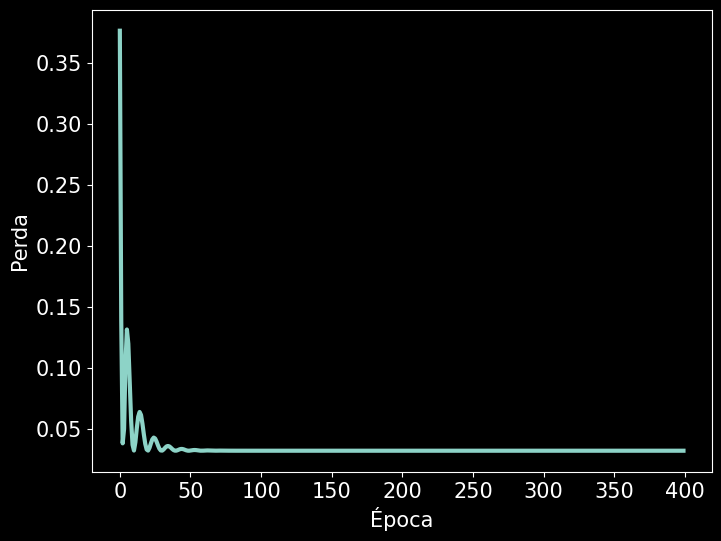

In [80]:
plt.plot(losses)
plt.xlabel('Época')
plt.ylabel('Perda')
plt.show()

#Teste

In [81]:
n_idades_teste = np.arange(0, 1.1, 0.1)

print(n_idades_teste)

n_valores_n1 = []
n_valores_n2 = []

weights, biases = model.layers[0].get_weights()

for i in n_idades_teste:
  n_valores_n1.append(i * weights[0][0] + biases[0])
  n_valores_n2.append(i * weights[0][1] + biases[1])

n_valores_n1 = np.array(n_valores_n1)
n_valores_n2 = np.array(n_valores_n2)


[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1. ]


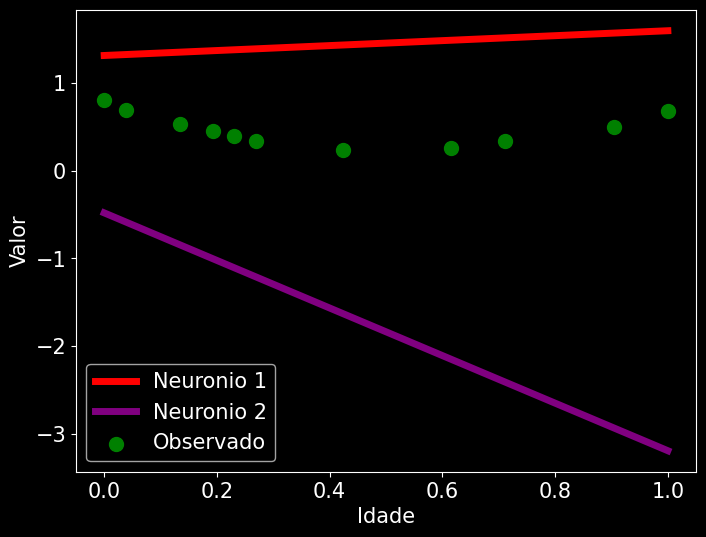

In [82]:
plt.plot(n_idades_teste, n_valores_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [83]:

n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_l1 = model.layers[0](np.array([i])[:,None])

  n_valores_ativados_n1.append(n_valores_l1[0][0])
  n_valores_ativados_n2.append(n_valores_l1[0][1])

n_valores_ativados_n1 = np.array(n_valores_ativados_n1)
n_valores_ativados_n2 = np.array(n_valores_ativados_n2)



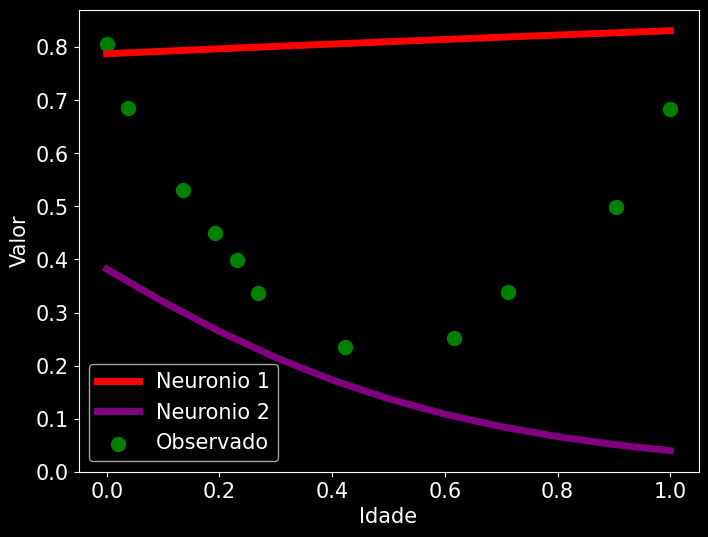

In [84]:
plt.plot(n_idades_teste, n_valores_ativados_n1, color="red", lw=5, label = 'Neuronio 1')
plt.plot(n_idades_teste, n_valores_ativados_n2, color="purple", lw=5, label = 'Neuronio 2')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()

In [85]:
n_valores_teste = []

n_valores_ativados_n1 = []
n_valores_ativados_n2 = []

for i in n_idades_teste:
  n_valores_teste.append(model.predict(np.array([i]))[0][0])

n_valores_teste = np.array(n_valores_teste)


1/1 [==============================] - 0s 18ms/step


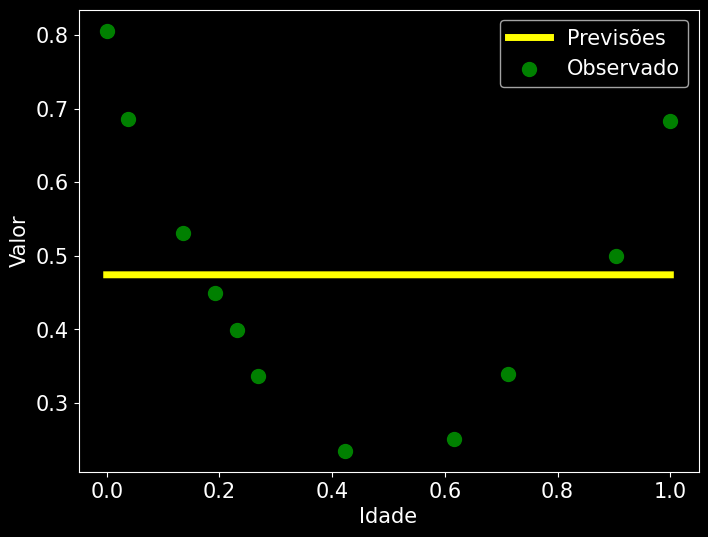

In [86]:
plt.plot(n_idades_teste, n_valores_teste, color="yellow", lw=5, label = 'Previsões')

plt.scatter(n_idades, n_valores, color="green", marker='o', s=100, label = 'Observado')
plt.xlabel('Idade')
plt.ylabel('Valor')
plt.legend()